### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [11]:
# creating a helper annotate method to label the plot components to make the plots more readable
def annotate(ax):
  for p in ax.patches:
    if p.get_height() > 0:
      ax.annotate(f'{(p.get_height()):.2f}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='center',
                  xytext=(0, 9),
                  textcoords='offset points',
                  fontsize=8,
                  fontweight='bold')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Examining the dataset's essential information and its data types

In [ ]:
# Examining the dataset's essential information and its data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Let's check the row and column counts

In [5]:
# checking the row and column counts
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {data.shape[1]}")

Number of rows: 12684
Number of columns: 26


In [21]:
print("Descriptive Statistics of All Variables:")
data.describe(include='all')

Descriptive Statistics of All Variables:


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684,12684,12684,12684.000000,12684,12684,12684,12684,12684,12684,...,12467,12533,12554,12495,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
unique,3,4,3,NaN,5,5,2,2,8,5,...,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN
top,No Urgent Place,Alone,Sunny,NaN,6PM,Coffee House,1d,Female,21,Married partner,...,less1,1~3,1~3,less1,NaN,NaN,NaN,NaN,NaN,NaN
freq,6283,7305,10069,NaN,3230,3996,7091,6511,2653,5100,...,3385,4672,5376,6077,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,63.301798,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,NaN,NaN,NaN,19.154486,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,NaN,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,NaN,NaN,NaN,80.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,1.000000,1.000000


In [23]:
# Missing values
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


The objective is to examine missing data and determine the percentage of missing values per column. Columns exceeding a 50% missing data threshold will be considered for removal, as they are not deemed worthwhile to keep. For columns below this threshold, missing values will be imputed using either the mean or the median, based on the respective column's data type.

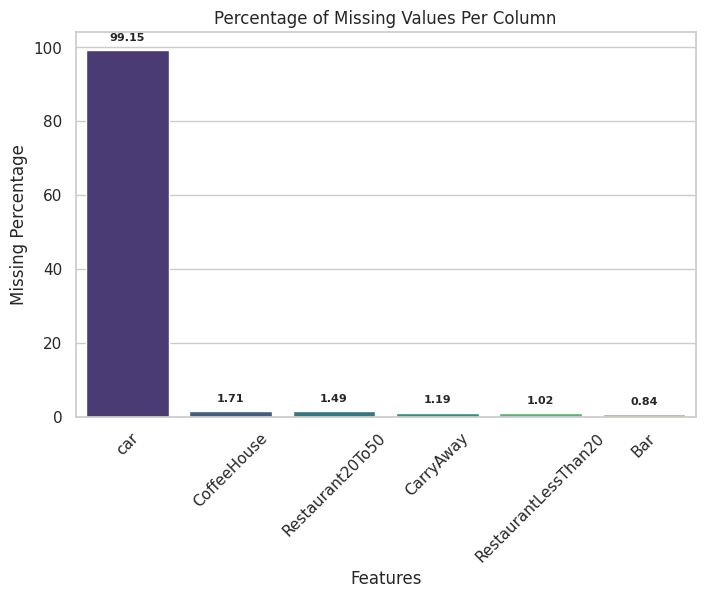

In [24]:
null_percentage = data.isnull().mean() * 100
null_percentage = null_percentage[null_percentage > 0]
null_percentage.sort_values(ascending=False, inplace=True)
null_percentage

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x=null_percentage.index, y=null_percentage, hue=null_percentage.index, palette='viridis')
annotate(ax)
plt.xticks(rotation=45)
plt.title('Percentage of Missing Values Per Column')
plt.ylabel('Missing Percentage')
plt.xlabel('Features')
plt.show()



We should also examine the outliers for the numerical values. Only temperature will be evaluated. The rest of the numerical columns are 0, 1 flag values.

In [26]:
# looking for numeric types
data.select_dtypes(include=np.number).describe()

# only two numerical columns should be evaluated. the rest is 0, 1 flag values.
# generating a box plot to visualize the quantiles
fig = px.box(
    data,
    y='temperature',
    points="all",       # Shows every single data point next to the box
    title="Temperature Distribution Analysis"
)
fig.show()

Although the plots appear fine, we should perform the calculations to confirm no outliers have been overlooked.

In [28]:
first_quartile = data['temperature'].quantile(0.25)
third_quartile = data['temperature'].quantile(0.75)
IQR = third_quartile - first_quartile

outliers = data.loc[((data['temperature'] < (first_quartile - 1.5 * IQR)) | (data['temperature'] > (third_quartile + 1.5 * IQR)))]
print(f"Number of outliers in temperature: {outliers.shape[0]}")

Number of outliers in temperature: 0


3. Decide what to do about your missing data -- drop, replace, other...

The 'car' column should be dropped because, as shown in the visualization above, it is mostly empty.
For other categorical columns containing missing values, the missing entries will be imputed using their respective mode values.

In [29]:
# dropping the car column since it is almost empy. Over 90% null.
data_archived = data.copy()
data = data.drop(columns=['car'])

# since the other columns has less than 5 percentage, we can fill them with the most frequent value.
# the remaining columns that have missing values are categorical columns.
# we can get the mode of each column to fill the null rows.
data['Bar'] = data['Bar'].fillna(data['Bar'].mode()[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].mode()[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].mode()[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].mode()[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].mode()[0])

print(f"Is there any missing value left? {'Yes' if data.isnull().sum().sum() > 0 else 'No'}")

Is there any missing value left? No


4. What proportion of the total observations chose to accept the coupon?



In [30]:
acceptance_percentage = data[['Y']].value_counts(normalize=True)[1]*100

print(f"The proportion of the total observations chose to accept the coupon is {acceptance_percentage:.2f}%")

The proportion of the total observations chose to accept the coupon is 56.84%


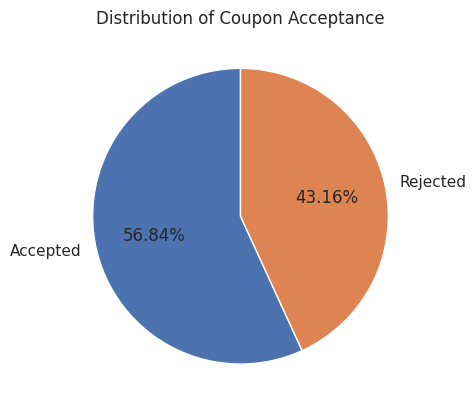

In [31]:
# Visualize the percentages with a pie plot
counts = data['Y'].value_counts()
labels = ['Accepted', 'Rejected']

plt.pie(
    counts, labels=labels,
    autopct='%1.2f%%',   # Shows the percentage on the slices
    startangle=90
)
plt.title('Distribution of Coupon Acceptance')
plt.ylabel('')
plt.show()

5. Use a bar plot to visualize the `coupon` column.

The exact requirement is unclear: is the goal to visualize the coupon acceptance rate or the coupon frequency? I am presenting both visualizations for a comprehensive view.

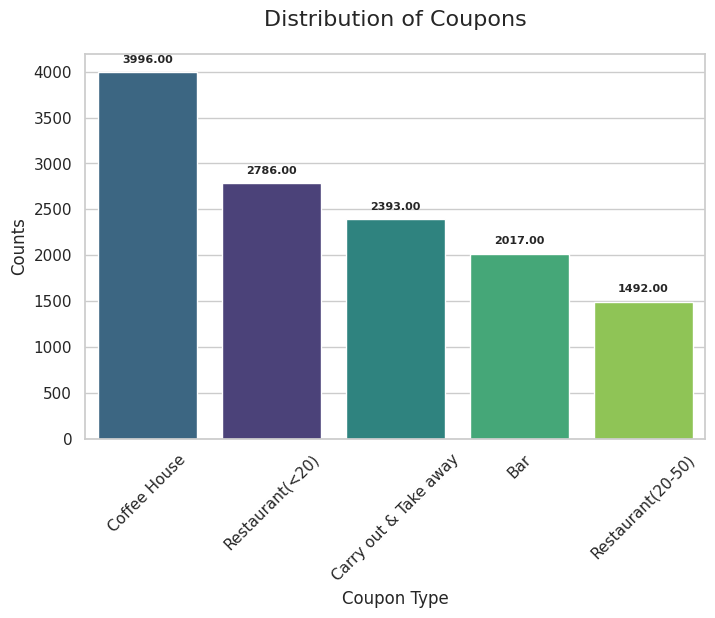

In [34]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
coupon_order = data['coupon'].value_counts().index
ax = sns.countplot(data, x='coupon', hue='coupon', order=coupon_order, palette='viridis', legend=False)
annotate(ax)
plt.xlabel('Coupon Type', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Counts', fontsize=12)
plt.title('Distribution of Coupons', fontsize=16, pad=20)
plt.show()

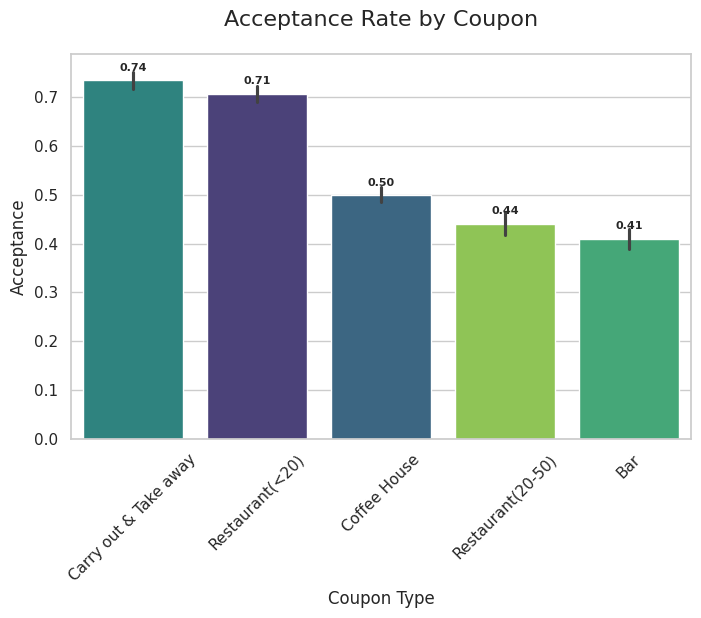

In [35]:

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
order = data.groupby('coupon')['Y'].mean().sort_values(ascending=False).index
ax = sns.barplot(data, x='coupon', y='Y', order=order, palette='viridis', hue='coupon', legend=False)
annotate(ax)
plt.xlabel('Coupon Type', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Acceptance', fontsize=12)
plt.title('Acceptance Rate by Coupon', fontsize=16, pad=20)
plt.show()

6. Use a histogram to visualize the temperature column.

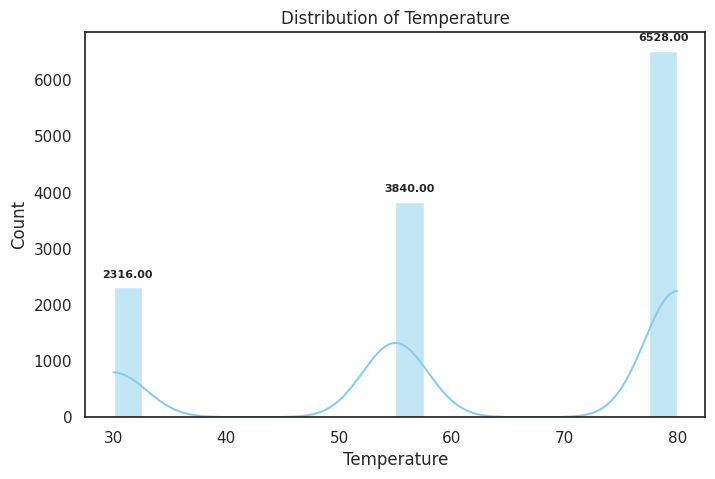

In [37]:
sns.set_theme(style="white")
plt.figure(figsize=(8,5))
ax = sns.histplot(data['temperature'], kde=True, color='skyblue', bins=20, edgecolor='white')
annotate(ax)
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Temperature')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [40]:
bar_coupons = data.loc[data['coupon'] == 'Bar']
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [41]:
acceptance_percentage = bar_coupons[['Y']].value_counts(normalize=True)[1]*100

print(f"The proportion of bar coupons were accepted is {acceptance_percentage:.2f}%")

The proportion of bar coupons were accepted is 41.00%


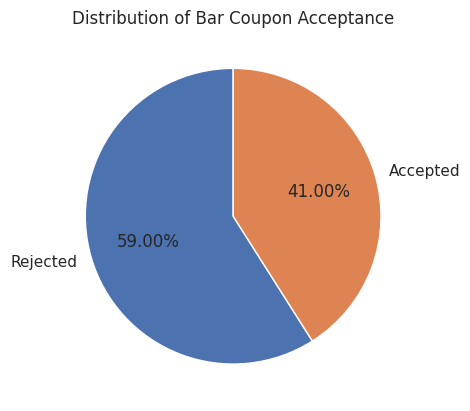

In [42]:
# Visualize the percentages with a pie plot
counts = bar_coupons['Y'].sort_values(ascending=False).value_counts()
labels = ['Rejected', 'Accepted']

plt.pie(
    counts, labels=labels,
    autopct='%1.2f%%',   # Shows the percentage on the slices
    startangle=90
)
plt.title('Distribution of Bar Coupon Acceptance')
plt.ylabel('')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [46]:
#bar_coupons['Bar'].value_counts()

less_than_3_bar_visits = ['never', 'less1', '1~3']
more_than_3_bar_visits = ['4~8', 'gt8']

bar_coupons_less_than_3 = bar_coupons[bar_coupons['Bar'].isin(less_than_3_bar_visits)]
bar_coupons_more_than_3 = bar_coupons[bar_coupons['Bar'].isin(more_than_3_bar_visits)]

acceptance_less_than_3 = bar_coupons_less_than_3['Y'].mean() * 100
acceptance_more_than_3 = bar_coupons_more_than_3['Y'].mean() * 100

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_less_than_3:.2f}%")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {acceptance_more_than_3:.2f}%")


Acceptance rate for those who went to a bar 3 or fewer times a month: 37.07%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


Let's visualize this.

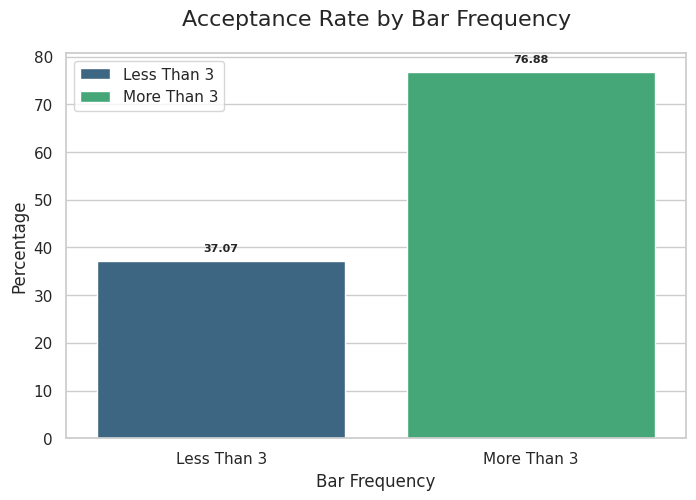

In [47]:
values = [acceptance_less_than_3, acceptance_more_than_3]
labels = ['Less Than 3', 'More Than 3']

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x=labels, y=values, hue=labels, palette='viridis', legend=True)
annotate(ax)
plt.xlabel('Bar Frequency', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Acceptance Rate by Bar Frequency', fontsize=16, pad=20)
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [48]:
#bar_coupons['age'].value_counts()
age_groups_younger_than_25 = ['below21', '21']
#bar_coupons['Bar'].value_counts()
less_than_1_bar_visits = ['never', 'less1']

frequent_bar_visitors_over_25 = bar_coupons.loc[(~bar_coupons['age'].isin(age_groups_younger_than_25)) & (~bar_coupons['Bar'].isin(less_than_1_bar_visits))]
all_others = bar_coupons.loc[(bar_coupons['age'].isin(age_groups_younger_than_25)) | (bar_coupons['Bar'].isin(less_than_1_bar_visits))]

frequent_bar_visitors_over_25_acceptance_rate = frequent_bar_visitors_over_25['Y'].mean() * 100
all_others_acceptance_rate = all_others['Y'].mean() * 100

print(f"Acceptance rate for drivers who go to a bar more than once a month and are over 25: {frequent_bar_visitors_over_25_acceptance_rate:.2f}%")
print(f"Acceptance rate for all others: {all_others_acceptance_rate:.2f}%")

Acceptance rate for drivers who go to a bar more than once a month and are over 25: 69.52%
Acceptance rate for all others: 33.50%


Let's visualize the rates.

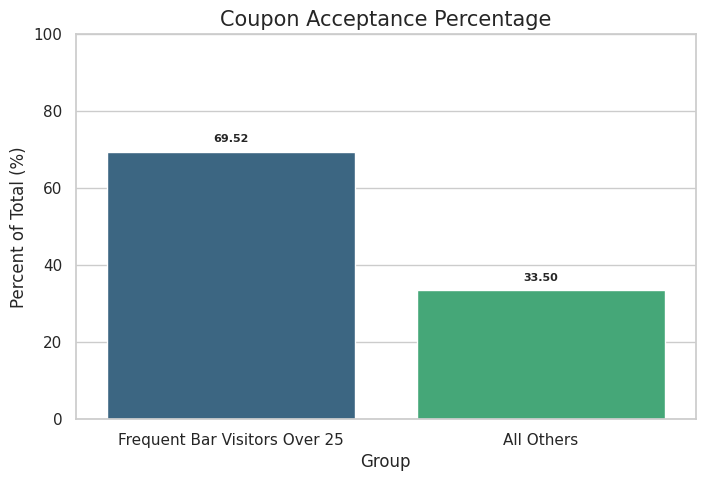

In [49]:
percentage_data = {
    'Group': ['Frequent Bar Visitors Over 25', 'All Others'],
    'Percentage': [frequent_bar_visitors_over_25_acceptance_rate, all_others_acceptance_rate]
}
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=percentage_data, x='Group', y='Percentage', hue='Group', palette='viridis')
annotate(ax)
plt.title('Coupon Acceptance Percentage', fontsize=15)
plt.ylabel('Percent of Total (%)')
plt.ylim(0, 100) # Ensures the scale is out of 100
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [50]:
# bar_coupons['occupation'].value_counts() ['Farming Fishing & Forestry']
# bar_coupons['Bar'].value_counts() ['never', 'less1']
# bar_coupons['passanger'].value_counts() ['Friend(s)', 'Partner']

occupation_farming_fishing_forestry = ['Farming Fishing & Forestry']
less_than_1_bar_visit = ['never', 'less1']
passenger_groups_with_no_kid = ['Friend(s)', 'Partner']

focussed_group = bar_coupons.loc[(~bar_coupons['occupation'].isin(occupation_farming_fishing_forestry)) & (~bar_coupons['Bar'].isin(less_than_1_bar_visit)) & (bar_coupons['passanger'].isin(passenger_groups_with_no_kid))]
focussed_group_acceptance_rate = focussed_group['Y'].mean() * 100

all_others = bar_coupons.loc[(bar_coupons['occupation'].isin(occupation_farming_fishing_forestry)) | (bar_coupons['Bar'].isin(less_than_1_bar_visit)) | (~bar_coupons['passanger'].isin(passenger_groups_with_no_kid))]
all_others_acceptance_rate = all_others['Y'].mean() * 100

print(f"Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {focussed_group_acceptance_rate:.2f}%")
print(f"Acceptance rate for all others: {all_others_acceptance_rate:.2f}%")


Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.79%
Acceptance rate for all others: 37.71%


Let's visualize this.

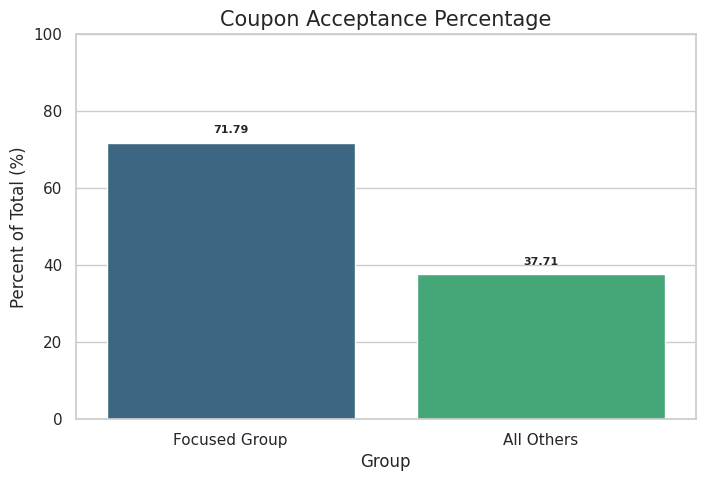

In [52]:
percentage_data = {
    'Group': ['Focused Group', 'All Others'],
    'Percentage': [focussed_group_acceptance_rate, all_others_acceptance_rate]
}
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=percentage_data, x='Group', y='Percentage', hue='Group', palette='viridis')
annotate(ax)
plt.title('Coupon Acceptance Percentage', fontsize=15)
plt.ylabel('Percent of Total (%)')
plt.ylim(0, 100) # Ensures the scale is out of 100
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [53]:
#bar_coupons['RestaurantLessThan20'].value_counts()
#bar_coupons['maritalStatus'].value_counts()
#bar_coupons['age'].value_counts()
#bar_coupons['income'].value_counts()

income_less_than_50K = ['$25000 - $37499', '$12500 - $24999', '$37500 - $49999', 'Less than $12500']
less_than_1_bar_visit = ['never', 'less1']
passenger_not_kid = ['Friend(s)', 'Partner']
marriage_status_widowed = ['Widowed']
younger_than_30 = ['below21', '21', '26']
more_than_4_cheap_restaurant_visit = ['4~8', 'gt8']

group1 = bar_coupons.loc[(~bar_coupons['Bar'].isin(less_than_1_bar_visit)) & (bar_coupons['passanger'].isin(passenger_not_kid)) & (~bar_coupons['maritalStatus'].isin(marriage_status_widowed))]
group1_acceptance_rate = group1['Y'].mean() * 100

group2 = bar_coupons.loc[(~bar_coupons['Bar'].isin(less_than_1_bar_visit)) & (bar_coupons['age'].isin(younger_than_30))]
group2_acceptance_rate = group2['Y'].mean() * 100

group3 = bar_coupons.loc[(bar_coupons['RestaurantLessThan20'].isin(more_than_4_cheap_restaurant_visit)) & (bar_coupons['income'].isin(income_less_than_50K))]
group3_acceptance_rate = group3['Y'].mean() * 100

print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {group1_acceptance_rate:.2f}%")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {group2_acceptance_rate:.2f}%")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {group3_acceptance_rate:.2f}%")


Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 71.79%
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 72.17%
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 45.35%


In [54]:
bar_coupons['passanger'].value_counts()

,count
passanger,
Alone,1200
Friend(s),337
Partner,274
Kid(s),206


Let's visualize these.

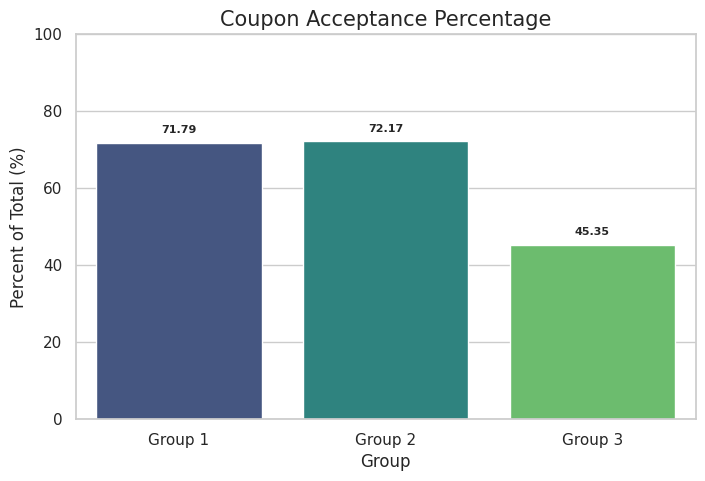

In [55]:
percentage_data = {
    'Group': ['Group 1', 'Group 2', 'Group 3'],
    'Percentage': [group1_acceptance_rate, group2_acceptance_rate, group3_acceptance_rate]
}
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=percentage_data, x='Group', y='Percentage', hue='Group', palette='viridis')
annotate(ax)
plt.title('Coupon Acceptance Percentage', fontsize=15)
plt.ylabel('Percent of Total (%)')
plt.ylim(0, 100) # Ensures the scale is out of 100
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

My conclusion is that drivers are more likely to accept bar coupons if they meet three criteria: frequent bar attendance (over three times monthly), an age greater than 25, and no children present during the drive. This indicates that the ideal target audience for bar coupons comprises adults who are already regular patrons of such venues and possess the autonomy to visit them, often free from familial responsibilities.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I will investigate 'Coffee House' coupons with various other dimensions.

In [56]:
coffee_house_coupons = data.loc[data['coupon'] == 'Coffee House']
coffee_house_coupons.head()

#coffee_house_coupons['CoffeeHouse'].value_counts().index.tolist() ['less1', '1~3', 'never', '4~8', 'gt8']
#coffee_house_coupons['destination'].value_counts().index.tolist() ['No Urgent Place', 'Home', 'Work']
#coffee_house_coupons['direction_same'].value_counts().index.tolist()  [0,1]
#coffee_house_coupons['direction_opp'].value_counts().index.tolist()  [0,1]
#coffee_house_coupons['age'].value_counts().index.tolist() ['21', '26', '31', '50plus', '36', '41', '46', 'below21']
#coffee_house_coupons['time'].value_counts().index.tolist() ['6PM', '7AM', '10AM', '2PM', '10PM']
#coffee_house_coupons['weather'].value_counts().index.tolist()  ['Sunny', 'Snowy', 'Rainy']
#coffee_house_coupons['temperature'].value_counts().index.tolist() [80, 55, 30]


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0


Here are some questions to analyze coffee house coupon acceptance, considering the specified dimensions:

1.  What is the overall acceptance rate for coffee house coupons?
2.  How does the acceptance rate for coffee house coupons vary based on the driver's frequency of visiting a coffee house
3.  Is there a significant difference in coffee house coupon acceptance when the `destination` is 'No Urgent Place', 'Home', or 'Work'?
4.  How do `direction_same` (0 or 1) and `direction_opp` (0 or 1) influence the acceptance of coffee house coupons?
5.  What is the acceptance rate across different `age` groups for coffee house coupons?
6.  Does the `time` of day the coupon is received impact the coffee house coupon acceptance rate?
7.  How do different `weather` conditions ('Sunny', 'Snowy', 'Rainy') correlate with coffee house coupon acceptance?
8.  Is there a notable difference in acceptance rates across various `temperature` levels (80, 55, 30)?

In [57]:
#What is the overall acceptance rate for coffee house coupons?

acceptance_percentage = coffee_house_coupons['Y'].mean()*100

print(f"The overall acceptance rate for coffee house coupons is {acceptance_percentage:.2f}%")

The overall acceptance rate for coffee house coupons is 49.92%


In [58]:
# How does the acceptance rate for coffee house coupons vary based on the driver's frequency of visiting a coffee house
# ['less1', '1~3', 'never', '4~8', 'gt8']

frequent_coffee_house_visitors = coffee_house_coupons.loc[~coffee_house_coupons['CoffeeHouse'].isin(['less1', 'never'])]
frequent_coffee_house_visitors_acceptance_rate = frequent_coffee_house_visitors['Y'].mean() * 100
print(f"Acceptance rate for drivers who go to a coffee house more than once a month: {frequent_coffee_house_visitors_acceptance_rate:.2f}%")

Acceptance rate for drivers who go to a coffee house more than once a month: 66.02%


Acceptance rate for No Urgent Place: 58.10%
Acceptance rate for Home: 36.21%
Acceptance rate for Work: 44.58%


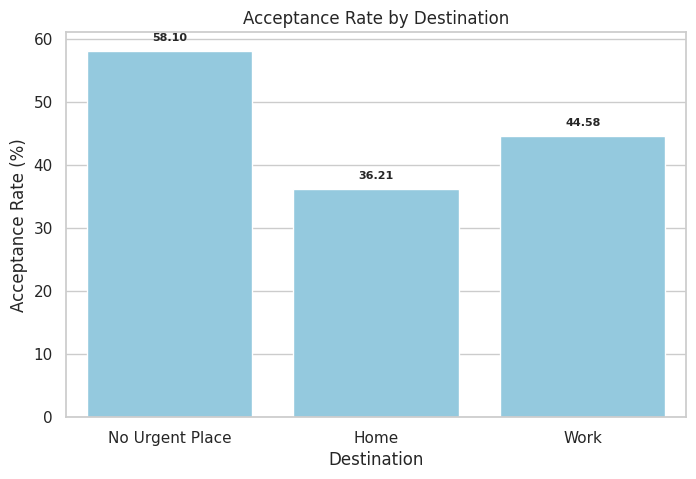

In [59]:
# Is there a significant difference in coffee house coupon acceptance when the `destination` is 'No Urgent Place', 'Home', or 'Work'?

destination_categories = ['No Urgent Place', 'Home', 'Work']
destination_acceptance_rates = {}

for destination in destination_categories:
    destination_data = coffee_house_coupons[coffee_house_coupons['destination'] == destination]
    acceptance_rate = destination_data['Y'].mean() * 100
    destination_acceptance_rates[destination] = acceptance_rate
    print(f"Acceptance rate for {destination}: {acceptance_rate:.2f}%")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,5))
ax = sns.barplot(x=list(destination_acceptance_rates.keys()), y=list(destination_acceptance_rates.values()), color='skyblue')
annotate(ax)
plt.xlabel('Destination')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate by Destination')
plt.show()

In [60]:
# How do `direction_same` (0 or 1) and `direction_opp` (0 or 1) influence the acceptance of coffee house coupons?

direction_same_acceptance_rate = coffee_house_coupons[coffee_house_coupons['direction_same'] == 1]['Y'].mean() * 100
direction_opp_acceptance_rate = coffee_house_coupons[coffee_house_coupons['direction_opp'] == 1]['Y'].mean() * 100

print(f"Acceptance rate for 'direction_same': {direction_same_acceptance_rate:.2f}%")
print(f"Acceptance rate for 'direction_opp': {direction_opp_acceptance_rate:.2f}%")

# Looks like there is not much difference.

Acceptance rate for 'direction_same': 53.07%
Acceptance rate for 'direction_opp': 49.20%


In [61]:
# What is the acceptance rate across different `age` groups for coffee house coupons?
# ['21', '26', '31', '50plus', '36', '41', '46', 'below21']

younger_than_30 = ['21', '26', 'below21']
older_than_30 = ['31', '36', '41', '46', '50plus']

younger_than_30_acceptance_rate = coffee_house_coupons[coffee_house_coupons['age'].isin(younger_than_30)]['Y'].mean() * 100
print(f"Acceptance rate for drivers younger than 30: {younger_than_30_acceptance_rate:.2f}%")

older_than_30_acceptance_rate = coffee_house_coupons[coffee_house_coupons['age'].isin(older_than_30)]['Y'].mean() * 100
print(f"Acceptance rate for drivers older than 30: {older_than_30_acceptance_rate:.2f}%")

Acceptance rate for drivers younger than 30: 53.43%
Acceptance rate for drivers older than 30: 46.81%


In [62]:
# Does the `time` of day the coupon is received impact the coffee house coupon acceptance rate?
# ['6PM', '7AM', '10AM', '2PM', '10PM']

morning = ['7AM', '10AM']
afternoon = ['6PM', '2PM', '10PM']

morning_acceptance_rate = coffee_house_coupons[coffee_house_coupons['time'].isin(morning)]['Y'].mean() * 100
print(f"Acceptance rate for drivers in the morning: {morning_acceptance_rate:.2f}%")

afternoon_acceptance_rate = coffee_house_coupons[coffee_house_coupons['time'].isin(afternoon)]['Y'].mean() * 100
print(f"Acceptance rate for drivers in the afternoon: {afternoon_acceptance_rate:.2f}%")


Acceptance rate for drivers in the morning: 54.25%
Acceptance rate for drivers in the afternoon: 46.34%


Acceptance rate for Sunny: 50.36%
Acceptance rate for Snowy: 43.23%
Acceptance rate for Rainy: 52.21%


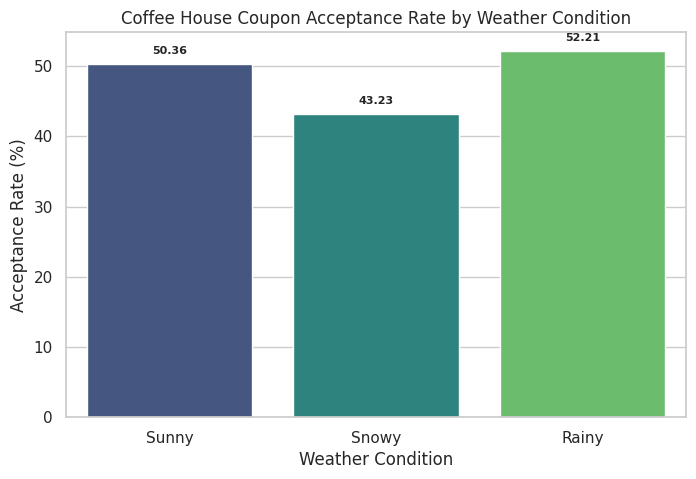

In [63]:
# How do different weather conditions ('Sunny', 'Snowy', 'Rainy') correlate with coffee house coupon acceptance?

weather_categories = ['Sunny', 'Snowy', 'Rainy']
weather_acceptance_rates = {}

for weather in weather_categories:
    weather_data = coffee_house_coupons[coffee_house_coupons['weather'] == weather]
    acceptance_rate = weather_data['Y'].mean() * 100
    weather_acceptance_rates[weather] = acceptance_rate
    print(f"Acceptance rate for {weather}: {acceptance_rate:.2f}%")

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=list(weather_acceptance_rates.keys()), y=list(weather_acceptance_rates.values()), hue=list(weather_acceptance_rates.keys()), palette='viridis')
plt.xlabel('Weather Condition')
plt.ylabel('Acceptance Rate (%)')
plt.title('Coffee House Coupon Acceptance Rate by Weather Condition')
annotate(ax)
plt.show()


In [64]:
# Is there a notable difference in acceptance rates across various temperature levels (80, 55, 30)?

temperature_categories = [80, 55, 30]
temperature_acceptance_rates = {}

for temperature in temperature_categories:
    temperature_data = coffee_house_coupons[coffee_house_coupons['temperature'] == temperature]
    acceptance_rate = temperature_data['Y'].mean() * 100
    temperature_acceptance_rates[temperature] = acceptance_rate
    print(f"Acceptance rate for {temperature} degrees: {acceptance_rate:.2f}%")

Acceptance rate for 80 degrees: 52.98%
Acceptance rate for 55 degrees: 45.58%
Acceptance rate for 30 degrees: 44.34%


Let's generate numeric columns and see how the correlation map will look like

In [65]:
coffee_house_coupons_numeric=coffee_house_coupons.copy()[['CoffeeHouse', 'destination', 'temperature', 'direction_same', 'direction_opp','weather', 'time', 'age', 'Y']]
coffee_house_coupons_numeric.info()

coffee_house_coupons_numeric['CoffeeHouseFrequent'] = coffee_house_coupons_numeric['CoffeeHouse'].apply(lambda x: 1 if x in ['1~3', '4~8', 'gt8'] else 0)
coffee_house_coupons_numeric['DestinationNotUrgent'] = coffee_house_coupons_numeric['destination'].apply(lambda x: 1 if x == 'No Urgent Place' else 0)
coffee_house_coupons_numeric['WeatherSunny'] = coffee_house_coupons_numeric['weather'].apply(lambda x: 1 if x == 'Sunny' else 0)
coffee_house_coupons_numeric['WeatherRainy'] = coffee_house_coupons_numeric['weather'].apply(lambda x: 1 if x == 'Rainy' else 0)
coffee_house_coupons_numeric['WeatherSnowy'] = coffee_house_coupons_numeric['weather'].apply(lambda x: 1 if x == 'Snowy' else 0)
coffee_house_coupons_numeric['TimeMorning'] = coffee_house_coupons_numeric['time'].apply(lambda x: 1 if x in ['7AM', '10AM'] else 0)
coffee_house_coupons_numeric['TimeAfternoon'] = coffee_house_coupons_numeric['time'].apply(lambda x: 1 if x in ['6PM', '2PM', '10PM'] else 0)
coffee_house_coupons_numeric['AgeYounger30'] = coffee_house_coupons_numeric['age'].apply(lambda x: 1 if x in ['21', '26', 'below21'] else 0)

coffee_house_coupons_numeric = coffee_house_coupons_numeric.drop(columns=['CoffeeHouse', 'destination', 'weather', 'time', 'age'])
coffee_house_coupons_numeric.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CoffeeHouse     3996 non-null   object
 1   destination     3996 non-null   object
 2   temperature     3996 non-null   int64 
 3   direction_same  3996 non-null   int64 
 4   direction_opp   3996 non-null   int64 
 5   weather         3996 non-null   object
 6   time            3996 non-null   object
 7   age             3996 non-null   object
 8   Y               3996 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 312.2+ KB


,temperature,direction_same,direction_opp,Y,CoffeeHouseFrequent,DestinationNotUrgent,WeatherSunny,WeatherRainy,WeatherSnowy,TimeMorning,TimeAfternoon,AgeYounger30
1,80,0,1,0,0,1,1,0,0,1,0,1
3,80,0,1,0,0,1,1,0,0,0,1,1
4,80,0,1,0,0,1,1,0,0,0,1,1
12,55,0,1,1,0,1,1,0,0,0,1,1
15,80,0,1,0,0,0,1,0,0,0,1,1


# Findings

Based on the analyses using specific dimensions, an observation was formed: drivers under 30 who frequently visit coffee houses tend to use the coupon in the mornings when the weather is not snowy.

This finding is also supported by a correlation matrix created after converting certain non-numeric columns to their numeric versions.

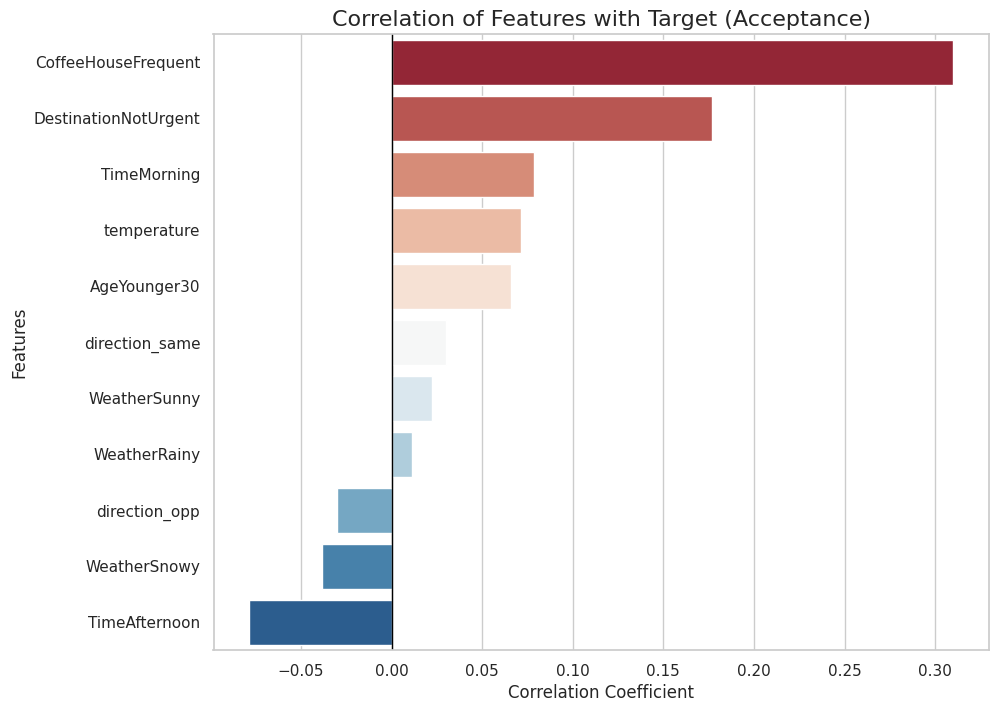

In [ ]:
# 1. Prepare data (dropping the target itself so it doesn't show a 1.0 correlation)
target_corr = coffee_house_coupons_numeric.corr(numeric_only=True)['Y'].drop('Y').sort_values(ascending=False)

# 2. Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, hue=target_corr.index, palette='RdBu')

# 3. Add styling
plt.title('Correlation of Features with Target (Acceptance)', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.show()

In [67]:
highest_acceptance = coffee_house_coupons.loc[(~coffee_house_coupons['CoffeeHouse'].isin(['less1', 'never'])) & (coffee_house_coupons['destination'].isin(['No Urgent Place'])) & (coffee_house_coupons['weather'].isin(['Sunny', 'Snowy'])) & (coffee_house_coupons['temperature'].isin([80])) & (coffee_house_coupons['time'].isin(['7AM', '10AM'])) & (coffee_house_coupons['age'].isin(['21', '26', 'below21']))]['Y'].mean() * 100

print(f"The highest acceptance rate is {highest_acceptance:.2f}%")

The highest acceptance rate is 83.03%
